# **Trabajo final**
grupo A1
- Cindy Tatiana Coy Pinto - 2200811
- Ana María Ramirez Capacho - 2200793
- Juan Sebastian Alba Gamboa - 2200807

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

#Punto 1
Lectura de los datasets

In [92]:
# Lectura de los datos con pandas

active = pd.read_csv('Global_active_power.csv')
reactive = pd.read_csv('Global_reactive_power.csv')
voltage = pd.read_csv('Voltage.csv')
intensity = pd.read_csv('Global_intensity.csv')

#Punto 2
Concatenar las tablas

In [93]:
# Concatenando los datos de todas las tablas
# utilizando solo las columnas que nos interesa
# para que no se repita la columna 'Datetime'

all = pd.concat([active,reactive['Global_reactive_power'],intensity['Global_intensity'],voltage['Voltage']],axis=1)
all       # Motramos la tabla resultante

,Datetime,Global_active_power,Global_reactive_power,Global_intensity,Voltage
0,2010-01-01 00:00:00,1.790,0.236,7.4,240.65
1,2010-01-01 00:01:00,1.780,0.234,7.4,240.07
2,2010-01-01 00:02:00,1.780,0.234,7.4,240.15
3,2010-01-01 00:03:00,1.746,0.186,7.2,240.26
4,2010-01-01 00:04:00,1.686,0.102,7.0,240.12
...,...,...,...,...,...
457390,2010-11-26 20:58:00,0.946,0.000,4.0,240.43
457391,2010-11-26 20:59:00,0.944,0.000,4.0,240.00
457392,2010-11-26 21:00:00,0.938,0.000,3.8,239.82
457393,2010-11-26 21:01:00,0.934,0.000,3.8,239.70


# Punto 3
Crear tablas de promedio diario y mensual

In [94]:
all = all.set_index('Datetime')         # Reindexamos la tabla con la columna Datetime
all.index = pd.to_datetime(all.index)   # Convertimos los datos del index en Datetime

In [95]:
all_M = all.resample('M').mean()        # Tabla promedio meses
all_D = all.resample('D').mean()        # Tabla proedio días
all_M                                   # Mostramos la tabla promedio meses


,Global_active_power,Global_reactive_power,Global_intensity,Voltage
Datetime,,,,
2010-01-31,1.300640,0.125182,5.430332,242.338522
2010-02-28,1.157539,0.109467,4.836624,242.002101
2010-03-31,1.170015,0.136368,4.920399,241.475284
2010-04-30,1.036334,0.129557,4.363496,241.442527
2010-05-31,1.075957,0.127221,4.551504,241.296151
2010-06-30,0.975306,0.145525,4.170282,240.888985
2010-07-31,0.778947,0.138093,3.337202,240.965167
2010-08-31,0.929452,0.130815,3.954423,241.422944
2010-09-30,0.997541,0.127700,4.223837,241.267517


# Punto 4
Hacer las regreciones

**importación y definición de funciones**

In [96]:
from scipy.optimize import curve_fit

In [97]:
def func1(x, a, b):
    return a*x+b

def func2(x, a, b, c):
    return a*x['Voltage'] + b*x['Global_intensity'] + c

In [98]:
all_D['Global_intensity'] = all_D['Global_intensity'].fillna(0)
all_D['Global_active_power'] = all_D['Global_active_power'].fillna(0)

**Fitting**

In [99]:
popt1, pcov1 = curve_fit(func1, all["Global_intensity"], all["Global_active_power"])
popt2, pcov2 = curve_fit(func1, all["Voltage"], all["Global_active_power"])
popt3, pcov3 = curve_fit(func2, all, all['Global_active_power'])

In [100]:
popt1M, pcov1M = curve_fit(func1, all_M["Global_intensity"], all_M["Global_active_power"])
popt2M, pcov2M = curve_fit(func1, all_M["Voltage"], all_M["Global_active_power"])
popt3M, pcov3M = curve_fit(func2, all_M, all_M['Global_active_power'])

In [101]:
popt1D, pcov1D = curve_fit(func1, all_D["Global_intensity"], all_D["Global_active_power"])
popt2D, pcov2D = curve_fit(func1, all_D["Voltage"], all_D["Global_active_power"])
popt3D, pcov3D = curve_fit(func2, all_D, all_D['Global_active_power'])

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


**Graficamos las 3 regreciones** \
**para cada conjunto de datos**

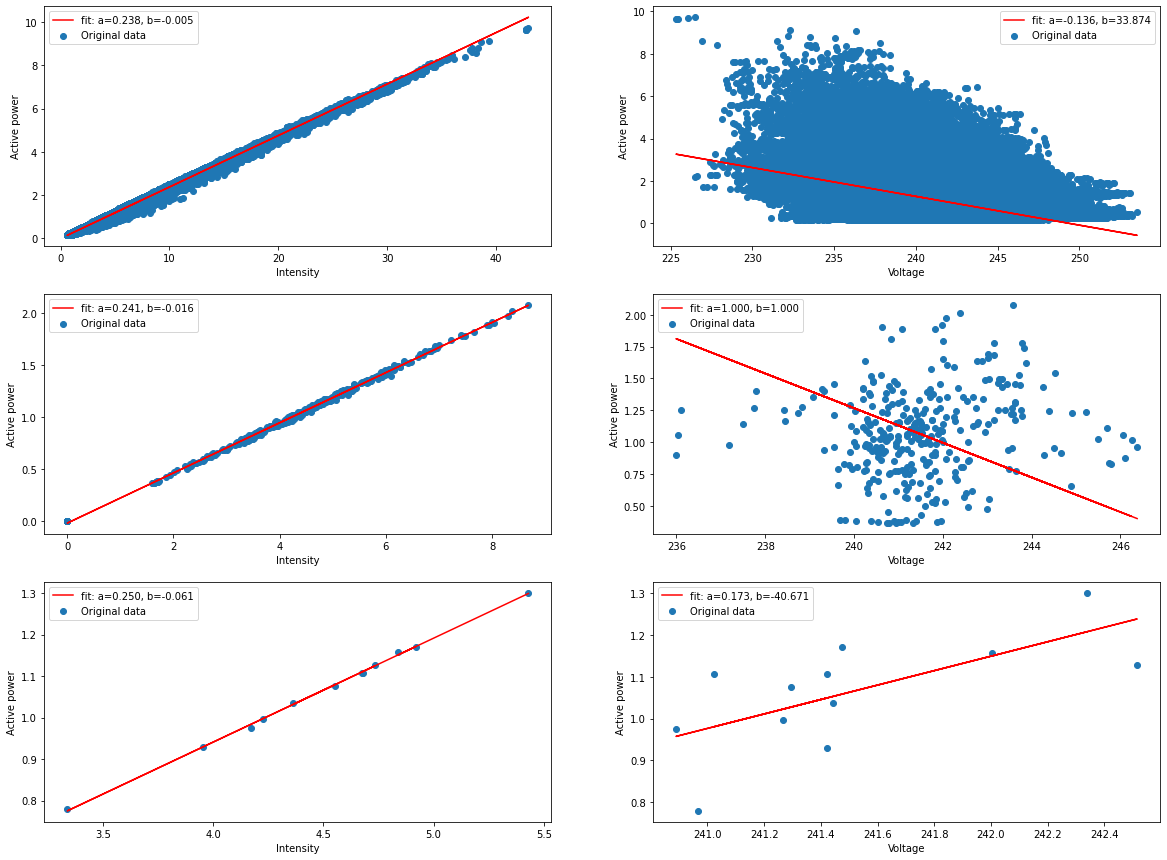

In [102]:
plt.figure(figsize=(20,15))

# Plots de all (data minutos)
plt.subplot(3,2,1)
plt.plot(all["Global_intensity"], func1(all["Global_intensity"], *popt1), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1))
plt.scatter(all["Global_intensity"],all["Global_active_power"],label="Original data")
plt.xlabel('Intensity')
plt.ylabel('Active power')
plt.legend()

plt.subplot(3,2,2)
plt.scatter(all["Voltage"],all['Global_active_power'],label='Original data')
plt.plot(all["Voltage"], func1(all["Voltage"], *popt2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt2))
plt.xlabel('Voltage')
plt.ylabel('Active power')
plt.legend()
#####################################
#####################################
# Plots de all_D (data dias)
plt.subplot(3,2,3)
plt.plot(all_D["Global_intensity"], func1(all_D["Global_intensity"], *popt1D), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1D))
plt.scatter(all_D["Global_intensity"],all_D["Global_active_power"],label="Original data")
plt.xlabel('Intensity')
plt.ylabel('Active power')
plt.legend()

plt.subplot(3,2,4)
plt.scatter(all_D["Voltage"],all_D['Global_active_power'],label='Original data')
plt.plot(all_D["Voltage"], func1(all_D["Voltage"], *popt2), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt2D))
plt.xlabel('Voltage')
plt.ylabel('Active power')
plt.legend()
#####################################
#####################################
# Plots de all_M (data meses)
plt.subplot(3,2,5)
plt.plot(all_M["Global_intensity"], func1(all_M["Global_intensity"], *popt1M), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt1M))
plt.scatter(all_M["Global_intensity"],all_M["Global_active_power"],label="Original data")
plt.xlabel('Intensity')
plt.ylabel('Active power')
plt.legend()

plt.subplot(3,2,6)
plt.scatter(all_M["Voltage"],all_M['Global_active_power'],label='Original data')
plt.plot(all_M["Voltage"], func1(all_M["Voltage"], *popt2M), 'r-',label='fit: a=%5.3f, b=%5.3f' % tuple(popt2M))
plt.xlabel('Voltage')
plt.ylabel('Active power')
plt.legend()

plt.show()

In [103]:
# Terminos para plot 3d de all (data minutes)
X = np.arange(all['Voltage'].min() - 1, all['Voltage'].max() + 1,0.01)
Y = np.arange(all['Global_intensity'].min() - 1, all['Global_intensity'].max()+1,0.01)
X, Y = np.meshgrid(X, Y)
Z = popt3[0]*X + popt3[1]*Y + popt3[2]
###############################################
###############################################
# Terminos para plot 3d de all_D (data dias)
XD = np.arange(all_D['Voltage'].min() - 1, all_D['Voltage'].max() + 1,0.01)
YD = np.arange(all_D['Global_intensity'].min() - 1, all_D['Global_intensity'].max()+1,0.01)
XD, YD = np.meshgrid(XD, YD)
ZD = popt3D[0]*XD + popt3D[1]*YD + popt3D[2]
###############################################
###############################################
# Terminos para plot 3d de all_M (data meses)
XM = np.arange(all_M['Voltage'].min() - 1, all_M['Voltage'].max() + 1,0.01)
YM = np.arange(all_M['Global_intensity'].min() - 1, all_M['Global_intensity'].max()+1,0.01)
XM, YM = np.meshgrid(XM, YM)
ZM = popt3M[0]*X + popt3M[1]*Y + popt3M[2]

Text(0.5, 0.92, 'fit: a=1.0, b=1.0, c=1.0')

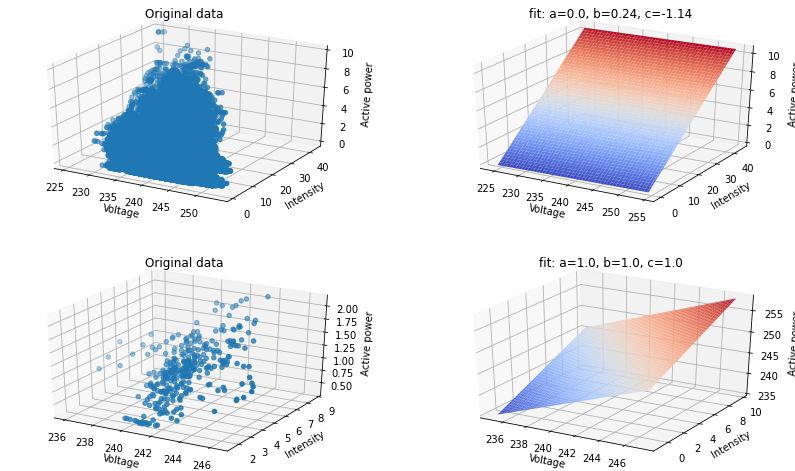

In [104]:
fig = plt.figure(figsize=(14,13)) # (largo,alto)
################
################
################
# Plot 3d de all (data minutos)
ax = fig.add_subplot(3, 2, 1, projection='3d')
ax.scatter(all['Voltage'],all['Global_intensity'],all['Global_active_power'],label= 'Original data')
ax.set_xlabel('Voltage')
ax.set_ylabel('Intensity')
ax.set_zlabel('Active power')
plt.title('Original data')

ax = fig.add_subplot(3, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, label='fit: a=' + str(popt3[0]) + ', b=' + str(popt3[1]) + ', c=' + str(popt3[2]))
ax.set_xlabel('Voltage')
ax.set_ylabel('Intensity')
ax.set_zlabel('Active power')
plt.title('fit: a=' + str(round(popt3[0], 2)) + ', b=' + str(round(popt3[1], 2)) + ', c=' + str(round(popt3[2], 2)))
#############################################
#############################################
# Plot 3d de all_D (data dias)
ax = fig.add_subplot(3, 2, 3, projection='3d')
ax.scatter(all_D['Voltage'],all_D['Global_intensity'],all_D['Global_active_power'],label= 'Original data')
ax.set_xlabel('Voltage')
ax.set_ylabel('Intensity')
ax.set_zlabel('Active power')
plt.title('Original data')

ax = fig.add_subplot(3, 2, 4, projection='3d')
ax.plot_surface(XD, YD, ZD, cmap=cm.coolwarm, label='fit: a=' + str(popt3D[0]) + ', b=' + str(popt3D[1]) + ', c=' + str(popt3D[2]))
ax.set_xlabel('Voltage')
ax.set_ylabel('Intensity')
ax.set_zlabel('Active power')
plt.title('fit: a=' + str(round(popt3D[0], 2)) + ', b=' + str(round(popt3D[1], 2)) + ', c=' + str(round(popt3D[2], 2)))

# Punto 5

Se evidencia una relación lineal entre la intencidad y la energía activa consumida registrada en el estudio. Mientras que, entre el voltaje y la energía activa no se presenta un comportamiento lineal evidente.

La funcion de regreción que asocia intencidad, voltage y energía activa muestra un comportamiento bastante crecano a los datos experimentales, sin embargo, esto se debe principalmente a la fuerte relación entre intensidad y elergía activa. La cual, mientras se hacía la regreción con los datos diarios promedio y mensuales promedio, esta representaba mejor los datos.